In [2]:
import numpy as np, matplotlib.pyplot as plt

# add path for python routines
import sys
sys.path.append('../')

# import polarization model functions
import polarization_2005_model as pol

This jupyter notebook shows how to compute and plot the results for a polarization model based on Kahniashvili, Gogoberidze and Ratra (2005) toy model

In [2]:
# Define parameters of turbulence model
nS = -11/3
nA = -14/3
# if broken is True, then the turbulence model considers
# a broken power law with subinertial spectral index of k^2
broken = True

# Array of wave numbers k and fractional helicity
# parameters
nk = 20
k = np.linspace(0.1, 10, nk)
h = np.linspace(0.1, 1., 10)

# Initial number of p points for integration
# Actual number will be low after first refinement
# which gets rid of p points that contribute very 
# few to the integral
npx0 = 50         
npmax = 100        # Max number of p points allowed
output = False     # if True, details on convergence will be shown
# only set to True for single k
# otherwise it will plot the value of the integrand
# function for every k
plot = False       
# set to true if you want your data to be written to a file
write = False
# head will be included at the beginning of your
# data files
head = ""

# compute class with information of the run
p1 = pol.compute_case(nS, nA, k, h, broken, npx0, \
                      npmax, output, plot, write, head)

Computing polarization case 


Computing for h = 0.10

Computing k = 1.00e-01
Not converged
Computing k = 6.21e-01
Computing k = 1.14e+00
Not converged
Computing k = 1.66e+00
Computing k = 2.18e+00
Computing k = 2.71e+00
Computing k = 3.23e+00
Not converged
Computing k = 3.75e+00
Not converged
Computing k = 4.27e+00
Not converged
Computing k = 4.79e+00
Not converged
Computing k = 5.31e+00
Not converged
Computing k = 5.83e+00
Not converged
Computing k = 6.35e+00
Not converged
Computing k = 6.87e+00
Not converged
Computing k = 7.39e+00
Not converged
Computing k = 7.92e+00
Not converged
Computing k = 8.44e+00
Not converged
Computing k = 8.96e+00
Not converged
Computing k = 9.48e+00
Not converged
Computing k = 1.00e+01
Not converged
Finished computing h = 0.10

Computing for h = 0.20

Computing k = 1.00e-01
Not converged
Computing k = 6.21e-01
Computing k = 1.14e+00
Not converged
Computing k = 1.66e+00
Computing k = 2.18e+00
Computing k = 2.71e+00
Computing k = 3.23e+00
Not converged
Compu

p1 contains information of the spectrum of polarization

p1.n_p shows the number of p points used for integration

This will be below npmax if the calculation has converged convergence is considered when either both symmetric and antisymmetric functions have 1% change between refinements and polarization 10% relative change, or viceversa

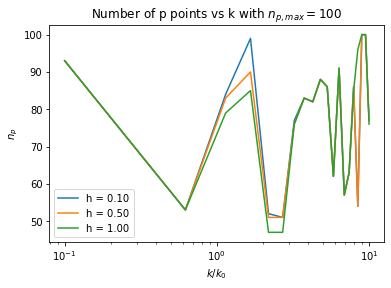

In [3]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# plot n_p vs k
for i in hs_ind:
    
    _= plt.plot(p1.k, p1.n_p[:, i],
                label = "h = %.2f"%p1.h[i])
    
_= plt.xscale('log')
_= plt.xlabel('$k/k_0$')
_= plt.ylabel('$n_p$')
_= plt.title('Number of p points vs k ' + 
                'with $n_{p,max} = %i$'%p1.npmax)
_= plt.legend()

p1.P contains the polarization, p1.IS the values of the symmetric function and p1.IA the values of the antisymmetric function

p1.conv has information on the wave numbers for which we have a converged solution of P, IS and IA

p1.k_good are the wave numbers with converged values and similarly for P, IS, IA

p1.k_bad contains the wave numbers that have not converged

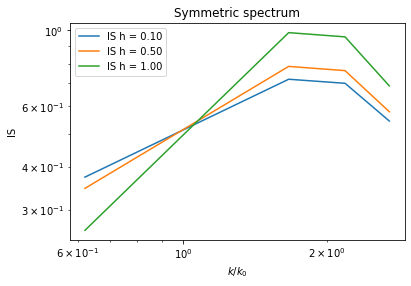

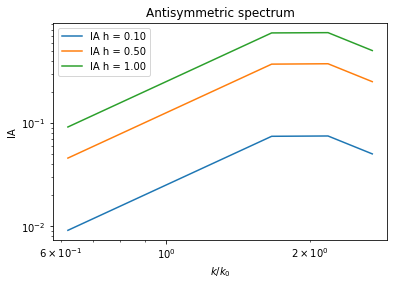

In [4]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Plot symmetric spectrum
for i in hs_ind:
    _ = plt.figure(1)
    _ = plt.plot(p1.k_good, p1.IS_good[:,i],
    #_ = plt.plot(p1.k, p1.IS[:,i],
              label = "IS h = %.2f"%p1.h[i])

# Plot antisymmetric spectrum
for i in hs_ind:
    _ = plt.figure(2)
    _ = plt.plot(p1.k_good, p1.IA_good[:,i],
    #_ = plt.plot(p1.k, p1.IA[:,i],
              label = "IA h = %.2f"%p1.h[i])

for i in range(0, 2):
    _ = plt.figure(i + 1)
    _ = plt.xscale('log')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel('$k/k_0$')
_ = plt.figure(1)
_ = plt.ylabel('IS')
_ = plt.title('Symmetric spectrum')
_ = plt.figure(2)
_ = plt.ylabel('IA')
_ = plt.title('Antisymmetric spectrum')

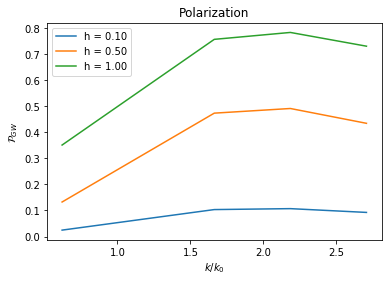

In [5]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Plot polarization
for i in hs_ind:
    _ = plt.plot(p1.k_good, p1.P_good[:,i],
              label = "h = %.2f"%p1.h[i])

#_ = plt.xscale('log')
_ = plt.legend()
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

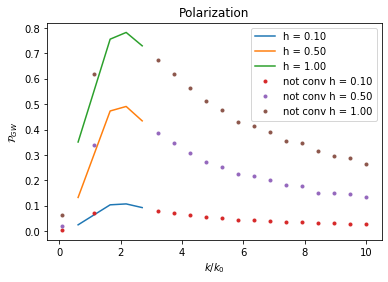

In [5]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Plot polarization where converged
for i in hs_ind:
    _ = plt.plot(p1.k_good, p1.P_good[:,i],
              label = "h = %.2f"%p1.h[i])

# Plot polarization where not converged
for i in hs_ind:
    _ = plt.plot(p1.k_bad, p1.P_bad[:,i], '.',
              label = "not conv h = %.2f"%p1.h[i])

#_ = plt.xscale('log')
_ = plt.legend()
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

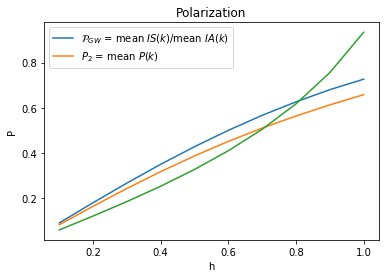

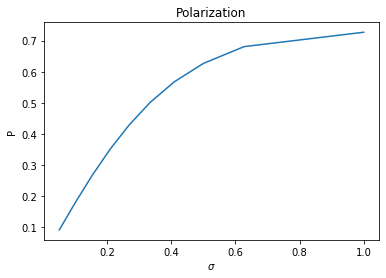

In [24]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Compute mean values of IS, IA, P
p1.mean()

# Plot P = (mean IS)/(mean IA) and P2 (mean P)
# Note that P is the correct way to define the
# polarization
_= plt.figure(1)
_= plt.plot(p1.h, p1.Pm,
            label = "${\cal P}_{GW}$ = mean $IS (k)$/mean $IA(k)$")
_= plt.plot(p1.h, p1.P2m,
            label = "$P_2$ = mean $P(k)$")
_= plt.xlabel('h')
_= plt.legend()

_= plt.plot(p1.h, 0.6*np.tan(p1.h))

# Plot P vs sigma parameter (related to h)
_= plt.figure(2)
_= plt.plot(p1.sigma, p1.Pm)
_= plt.xlabel('$\sigma$')

for i in range(0, 2):
    _= plt.figure(i + 1)
    _= plt.ylabel("P")
    _= plt.title("Polarization")